# Library

In [60]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

# Function

In [61]:
def initial_pop_digit(pop_size=10,n_genotype=3,first_num=0,final_num=100):
    data = np.arange(first_num,final_num)
    all_pop = np.random.choice(data,(pop_size, n_genotype))
    return all_pop

In [62]:
def pop_standard(size_df_major):
    pop = np.arange(0,size_df_major)
    return pop

In [63]:
def set_measure_paramter(df_major):
    original_mean = np.array(np.mean(df_major[df_major.columns[0:]]))
    original_variance = np.array(np.std(df_major[df_major.columns[0:]]))
    ori_median = []
    for l in df_major.columns[:]:
        ori_median.append(np.array(np.median(df_major[l])))
    original_median = np.array(ori_median)
    
    return original_mean,original_median,original_variance

In [477]:
def fitness(pop_dg,pop_s,df_major,original_mean,original_median,original_variance,size_df_minor): #1*-1 dimension
    #pop_s is pop_s
    #pop_dg is pop_dg
    g_new_pop_s = []
    fitness_new_pop_s = []

    for p in pop_dg:
        idx = np.argsort(p) #sort small to big
        new_pop_s = pop_s[idx]
        g_new_pop_s.append(new_pop_s)
        
        #Evaluation fitness
        each_table =df_major.iloc[new_pop_s[0:size_df_minor]]
        
        MMV = set_measure_paramter(each_table) # Calculate mean median and variance 
        '''
        print("Size of Table = \n",len(each_table))
        print(each_table)
        print("Population of digit = {} \n mean = {} \n median = {} \n variance = {} ".format(p,MMV[0],MMV[1],MMV[2]))
        print("\n")
        '''
        
        obj_each_column = (original_mean-MMV[0])**2+(original_median-MMV[1])**2+(original_variance-MMV[2])**2
        each_fitness = np.sum(obj_each_column)
        fitness_new_pop_s.append(each_fitness)
        
        #print("obj of each columns = \n",obj_each_column)
        #print("each fitness = ",each_fitness)
        
    idx_best = np.argsort(fitness_new_pop_s)
    pop_dg = pop_dg[idx_best]
    fitness_new_pop_s = np.array(fitness_new_pop_s).reshape(1,-1)[0][idx_best]
    g_new_pop_s = np.array(g_new_pop_s)[idx_best]
    return pop_dg,g_new_pop_s,fitness_new_pop_s

In [65]:
def crossover(pop,p_cross=0.7,n_genotype=3,p_size=10):
    for k in range(2,p_size,2): 
        if np.random.rand()<p_cross:
            parent = np.random.randint(0,p_size, 2) 
            crosspoint1 = np.random.randint(0, n_genotype)
            crosspoint2 = np.random.randint(crosspoint1, n_genotype)
            offsprint1 = np.concatenate((pop[parent[0]][:crosspoint1],pop[parent[1]][crosspoint1:crosspoint2],pop[parent[0]][crosspoint2:]))
            offsprint2 = np.concatenate((pop[parent[1]][:crosspoint1],pop[parent[0]][crosspoint1:crosspoint2],pop[parent[1]][crosspoint2:]))
            pop[k] = offsprint1
            pop[k+1] = offsprint2
            
            #print("which",k,k+1)
            #print("parent",parent)
            #print("position",crosspoint1,crosspoint2)
    return pop

In [533]:
def mutattion(pop,p_mutate=0.2,n_genotype=3,p_size=10,first_posi=0,final_posi=100):
    data = np.arange(first_posi,final_posi)
    for k in range(0, p_size-1):
        if np.random.rand() < p_mutate:
            
            if k == 0:
                mutatepoint1 = np.random.randint(1, n_genotype)
                mutatepoint2 = np.random.randint(1, n_genotype)
                mutatepoint3 = np.random.randint(1, n_genotype)
                pop[p_size-1][mutatepoint1] = np.random.choice(data)
                pop[p_size-1][mutatepoint2] = np.random.choice(data)
                pop[p_size-1][mutatepoint3] = np.random.choice(data)
            else:  
                mutatepoint1 = np.random.randint(1, n_genotype)
                mutatepoint2 = np.random.randint(1, n_genotype)
                mutatepoint3 = np.random.randint(1, n_genotype)
                pop[k][mutatepoint1] = np.random.choice(data)
                pop[k][mutatepoint2] = np.random.choice(data)
                pop[k][mutatepoint3] = np.random.choice(data)
            
            #print(k) 
            #print(mutatepoint1)
            #print(pop[k][mutatepoint1])
    return pop

# Work Space

## 1.1 Input major and minor data

In [67]:
df = pd.read_excel("data_8000_203.xlsx")

In [68]:
Exited1 = []
Exited0 = []
for index,data in enumerate(df['Exited']):
    if data == 1:
        Exited1.append(index)
    else:
        Exited0.append(index)
print("Size of Exited1 (Minor)",len(Exited1))
print("Size of Exited0 (Major)",len(Exited0))

Size of Exited1 (Minor) 203
Size of Exited0 (Major) 7963


In [69]:
df_major = df.iloc[Exited0]
df_minor = df.iloc[Exited1]

df_major = pd.DataFrame(df_major,columns=df.columns[2:])
df_minor = pd.DataFrame(df_minor,columns=df.columns[2:])

In [70]:
#df_major = pd.read_excel("class-0-churn-no-sur.xlsx")
#df_minor = pd.read_excel("class-1-churn-no-sur.xlsx")

## 1.2 Information of data

In [71]:
print(df_major.info())
print("\n")
print(df_minor.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7963 entries, 0 to 8165
Data columns (total 10 columns):
CreditScore        7963 non-null int64
Geography          7963 non-null int64
Gender             7963 non-null int64
Age                7963 non-null int64
Tenure             7963 non-null int64
Balance            7963 non-null float64
NumOfProdect       7963 non-null int64
HasCrCard          7963 non-null int64
IsActiveMember     7963 non-null int64
EstimatedSalary    7963 non-null float64
dtypes: float64(2), int64(8)
memory usage: 684.3 KB
None


<class 'pandas.core.frame.DataFrame'>
Int64Index: 203 entries, 24 to 8086
Data columns (total 10 columns):
CreditScore        203 non-null int64
Geography          203 non-null int64
Gender             203 non-null int64
Age                203 non-null int64
Tenure             203 non-null int64
Balance            203 non-null float64
NumOfProdect       203 non-null int64
HasCrCard          203 non-null int64
IsActiveMember     203 non-

In [72]:
df_major.head(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProdect,HasCrCard,IsActiveMember,EstimatedSalary
0,608,1,0,41,1,83807.86,1,0,1,112542.58
1,699,0,0,39,1,0.00,2,0,0,93826.63
2,850,1,0,43,2,125510.82,1,1,1,79084.10
3,822,0,1,50,7,0.00,2,1,1,10062.80
4,501,0,1,44,4,142051.07,2,0,1,74940.50


## 1.3 Remove some columns are not related 

In [51]:
df_major.drop(df_major.columns[[0,1]], axis = 1 , inplace = True) # axis = 0 remove row if axis = 1 remove column cut feature Patient Id
# inplace = True คือ ลบแบบถาวร

C:\Users\L\Anaconda3\lib\site-packages\pandas\core\frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [73]:
df_major

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProdect,HasCrCard,IsActiveMember,EstimatedSalary
0,608,1,0,41,1,83807.86,1,0,1,112542.58
1,699,0,0,39,1,0.00,2,0,0,93826.63
2,850,1,0,43,2,125510.82,1,1,1,79084.10
3,822,0,1,50,7,0.00,2,1,1,10062.80
4,501,0,1,44,4,142051.07,2,0,1,74940.50
...,...,...,...,...,...,...,...,...,...,...
8161,644,0,1,28,7,155060.41,1,1,0,29179.52
8162,800,0,0,29,2,0.00,2,0,0,167773.55
8163,771,0,1,39,5,0.00,2,1,0,96270.64
8164,516,0,1,35,10,57369.61,1,1,1,101699.77


In [74]:
print("size of major data",df_major.shape)
print("size of minor data",df_minor.shape)

size of major data (7963, 10)
size of minor data (203, 10)


## 1.4 before loop

In [534]:
n_iter = 3000
n_pop = 20
n_genotype = len(df_major)
p_cross = 1
p_mutate = 1

pop_dg = initial_pop_digit(n_pop,n_genotype,0,10000)
pop_s = pop_standard(n_genotype)
best_pop_dg = []
best_pop_s = []
best_fitness = []
z=0

In [535]:
stat_ori = set_measure_paramter(df_major) #Statistic of original data (mean, median, variance)
size_df_minor = len(df_minor)

## 1.5 Loop of genetic algorithm

iteration:1 [fitness = 2.130] 
iteration:2 [fitness = 1.109] 
iteration:3 [fitness = 1.070] 
iteration:4 [fitness = 0.488] 
iteration:5 [fitness = 0.330] 
iteration:6 [fitness = 0.330] 
iteration:7 [fitness = 0.330] 
iteration:8 [fitness = 0.328] 
iteration:9 [fitness = 0.328] 
iteration:10 [fitness = 0.328] 
iteration:11 [fitness = 0.328] 
iteration:12 [fitness = 0.328] 
iteration:13 [fitness = 0.328] 
iteration:14 [fitness = 0.328] 
iteration:15 [fitness = 0.328] 
iteration:16 [fitness = 0.328] 
iteration:17 [fitness = 0.328] 
iteration:18 [fitness = 0.328] 
iteration:19 [fitness = 0.328] 
iteration:20 [fitness = 0.328] 
iteration:21 [fitness = 0.328] 
iteration:22 [fitness = 0.328] 
iteration:23 [fitness = 0.328] 
iteration:24 [fitness = 0.084] 
iteration:25 [fitness = 0.084] 
iteration:26 [fitness = 0.084] 
iteration:27 [fitness = 0.084] 
iteration:28 [fitness = 0.084] 
iteration:29 [fitness = 0.084] 
iteration:30 [fitness = 0.084] 
iteration:31 [fitness = 0.084] 
iteration:32 [fit

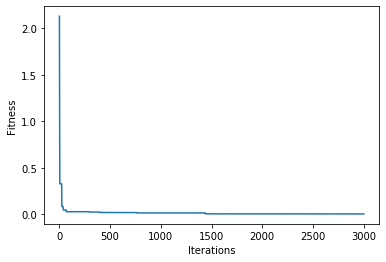

In [536]:
while z<n_iter:
    z+=1
    group_solu = fitness(pop_dg,pop_s,df_major,stat_ori[0],stat_ori[1],stat_ori[2],size_df_minor)
    best_pop_dg.append(group_solu[0][0])
    best_pop_s.append(group_solu[1][0])
    best_fitness.append(group_solu[2][0])
    
    print('iteration:{} [fitness = {:.3f}] '.format(z,group_solu[2][0]))
    final_cross_pop = crossover(group_solu[0],p_cross,n_genotype,n_pop)
    final_mutate_pop = mutattion(final_cross_pop,p_mutate,n_genotype,n_pop,0,len(df_minor))
    pop_dg = final_mutate_pop 
plt.clf()
xticks = range(1, len(best_fitness)+1)
plt.plot(xticks, best_fitness)
plt.xlabel('Iterations')
plt.ylabel('Fitness')
plt.pause(1e-10)
plt.show()

## 1.6 Show new Data

In [537]:
idex_final = np.argsort(best_fitness) #sort small to big
final_pop_s = best_pop_s[idex_final[0]]
final_fitness = best_fitness[idex_final[0]]
#print("best rock: fitness = {}\n{}".format(best_fitness[idex_final[0]],best_pop_s[idex_final[0]].reshape((8,10))))
str_fitness = str(final_fitness)[0:10]

In [538]:
print("best pop: fitness = {}\n{}".format(final_fitness,final_pop_s))

best pop: fitness = 0.0046405574550611286
[4989 5523 4748 ... 1239 5563 1446]


In [539]:
final_table =df_major.iloc[final_pop_s[0:size_df_minor]]

In [540]:
final_table

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProdect,HasCrCard,IsActiveMember,EstimatedSalary
5121,600,0,1,34,0,0.00,2,0,1,3756.23
5669,679,1,1,33,4,96110.22,1,1,0,1173.23
4872,640,0,0,20,4,0.00,2,0,1,78310.82
6191,838,1,0,41,5,0.00,2,1,0,81313.51
717,565,0,1,36,6,106192.10,1,1,0,149575.59
...,...,...,...,...,...,...,...,...,...,...
7528,546,2,0,25,3,132837.70,1,1,0,131647.31
3609,684,1,0,31,8,0.00,2,1,0,188637.05
3154,673,2,0,25,3,108244.82,2,1,1,103573.96
2026,476,0,0,32,6,111871.93,1,0,0,112132.86


## 1.7 Show parameter

In [541]:
set_measure_paramter(final_table)

(array([6.46990148e+02, 6.74876847e-01, 5.46798030e-01, 3.66256158e+01,
        5.10837438e+00, 7.27653370e+04, 1.54187192e+00, 6.69950739e-01,
        5.17241379e-01, 9.97696376e+04]),
 array([6.490000e+02, 0.000000e+00, 1.000000e+00, 3.600000e+01,
        5.000000e+00, 9.205344e+04, 2.000000e+00, 1.000000e+00,
        1.000000e+00, 9.980599e+04]),
 array([9.83325508e+01, 8.08031946e-01, 4.97805127e-01, 8.52280245e+00,
        2.80184296e+00, 6.27111565e+04, 4.98243657e-01, 4.70230525e-01,
        4.99702646e-01, 5.74340769e+04]))

In [542]:
stat_ori

(array([6.51853196e+02, 6.84917745e-01, 5.72522918e-01, 3.74083888e+01,
        5.03327891e+00, 7.27452968e+04, 1.54426724e+00, 7.07145548e-01,
        5.54564862e-01, 9.97383918e+04]),
 array([6.530000e+02, 0.000000e+00, 1.000000e+00, 3.600000e+01,
        5.000000e+00, 9.207268e+04, 2.000000e+00, 1.000000e+00,
        1.000000e+00, 9.964504e+04]),
 array([9.56478307e+01, 8.00952170e-01, 4.94712468e-01, 1.01247271e+01,
        2.88047686e+00, 6.28440943e+04, 5.09503529e-01, 4.55072216e-01,
        4.97013758e-01, 5.74019823e+04]))

## 1.8 Plot each Distribution

In [543]:
#sns.pairplot(df_major)

In [544]:
#sns.pairplot(final_table)

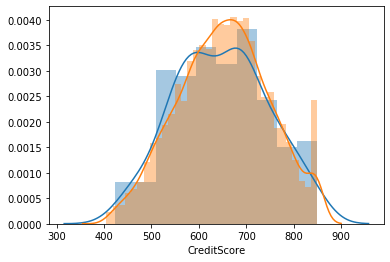

In [545]:
#best
sns.distplot(final_table[final_table.columns[0]])
#Orihinal
sns.distplot(df_major[df_major.columns[0]])

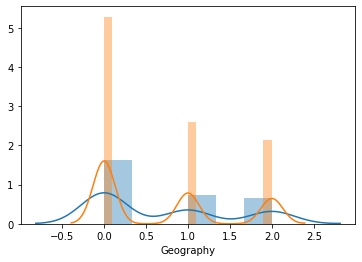

In [546]:
#best
sns.distplot(final_table[final_table.columns[1]])
#Orihinal
sns.distplot(df_major[df_major.columns[1]])

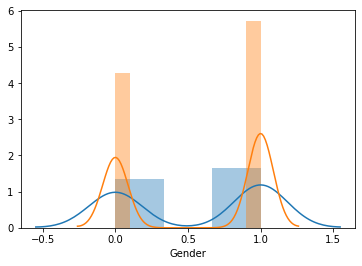

In [547]:
#best
sns.distplot(final_table[final_table.columns[2]])
#Orihinal
sns.distplot(df_major[df_major.columns[2]])

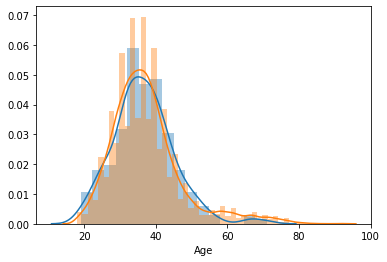

In [548]:
#best
sns.distplot(final_table[final_table.columns[3]])
#Orihinal
sns.distplot(df_major[df_major.columns[3]])

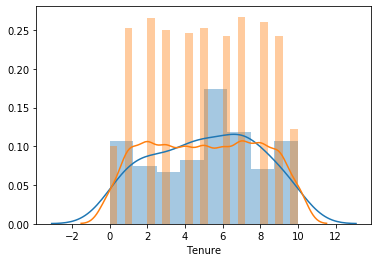

In [549]:
#best
sns.distplot(final_table[final_table.columns[4]])
#Orihinal
sns.distplot(df_major[df_major.columns[4]])

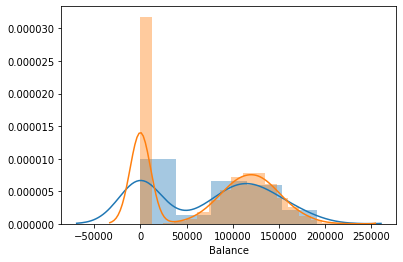

In [550]:
#best
sns.distplot(final_table[final_table.columns[5]])
#Orihinal
sns.distplot(df_major[df_major.columns[5]])

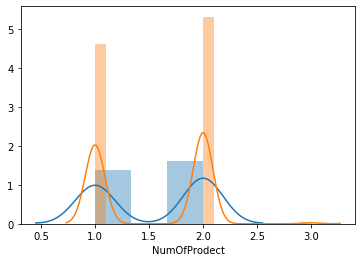

In [551]:
#best
sns.distplot(final_table[final_table.columns[6]])
#Orihinal
sns.distplot(df_major[df_major.columns[6]])

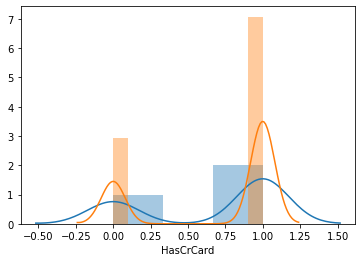

In [552]:
#best
sns.distplot(final_table[final_table.columns[7]])
#Orihinal
sns.distplot(df_major[df_major.columns[7]])

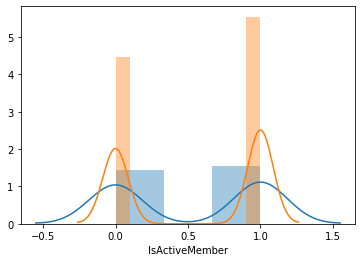

In [553]:
#best
sns.distplot(final_table[final_table.columns[8]])
#Orihinal
sns.distplot(df_major[df_major.columns[8]])

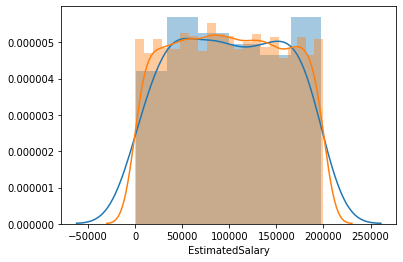

In [554]:
#best
sns.distplot(final_table[final_table.columns[9]])
#Orihinal
sns.distplot(df_major[df_major.columns[9]])

In [555]:
#best
#sns.distplot(final_table[final_table.columns[10]])
#Orihinal
#sns.distplot(df_major[df_major.columns[10]])

## 1.9 Combine new data with minority class

In [556]:
new_df_major = df.iloc[Exited0].iloc[final_pop_s[0:size_df_minor]]

In [557]:
new_df_major

,Row no.,Exited,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProdect,HasCrCard,IsActiveMember,EstimatedSalary
5121,5122,0,600,0,1,34,0,0.00,2,0,1,3756.23
5669,5670,0,679,1,1,33,4,96110.22,1,1,0,1173.23
4872,4873,0,640,0,0,20,4,0.00,2,0,1,78310.82
6191,6192,0,838,1,0,41,5,0.00,2,1,0,81313.51
717,718,0,565,0,1,36,6,106192.10,1,1,0,149575.59
...,...,...,...,...,...,...,...,...,...,...,...,...
7528,7529,0,546,2,0,25,3,132837.70,1,1,0,131647.31
3609,3610,0,684,1,0,31,8,0.00,2,1,0,188637.05
3154,3155,0,673,2,0,25,3,108244.82,2,1,1,103573.96
2026,2027,0,476,0,0,32,6,111871.93,1,0,0,112132.86


In [558]:
DATA = np.vstack((new_df_major,df.iloc[Exited1]))

In [559]:
DATAnew = pd.DataFrame(DATA, columns=df.columns[0:])

In [560]:
DATAnew

,Row no.,Exited,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProdect,HasCrCard,IsActiveMember,EstimatedSalary
0,5122.0,0.0,600.0,0.0,1.0,34.0,0.0,0.00,2.0,0.0,1.0,3756.23
1,5670.0,0.0,679.0,1.0,1.0,33.0,4.0,96110.22,1.0,1.0,0.0,1173.23
2,4873.0,0.0,640.0,0.0,0.0,20.0,4.0,0.00,2.0,0.0,1.0,78310.82
3,6192.0,0.0,838.0,1.0,0.0,41.0,5.0,0.00,2.0,1.0,0.0,81313.51
4,718.0,0.0,565.0,0.0,1.0,36.0,6.0,106192.10,1.0,1.0,0.0,149575.59
...,...,...,...,...,...,...,...,...,...,...,...,...
401,7851.0,1.0,504.0,2.0,0.0,44.0,0.0,131873.07,2.0,1.0,1.0,158036.72
402,7934.0,1.0,710.0,1.0,1.0,62.0,3.0,131078.42,2.0,1.0,0.0,119348.76
403,7956.0,1.0,627.0,2.0,1.0,24.0,5.0,102773.20,2.0,1.0,0.0,56793.02
404,7975.0,1.0,520.0,0.0,1.0,49.0,5.0,121197.64,1.0,1.0,0.0,72577.33


## 2.0 Save Dataset to xlsx file

In [561]:
DATAnew.to_excel('406_resampling_under_obj'+str_fitness+'.xlsx')

## 2.1 Save fitness of each iteration

In [562]:
# save numpy array as csv file
from numpy import asarray
from numpy import savetxt

# save to csv file
savetxt('data_fitness'+str_fitness+'.csv', best_fitness, delimiter=',')

## 2.2 test load fitness file